In [1]:
import nltk
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
import re
import random
from sklearn.linear_model import LogisticRegression

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [137]:
from nltk.tokenize import word_tokenize

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/fatma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " ", string)
    string = re.sub(r"\'ve", " ", string)
    string = re.sub(r"n\'t", " ", string)
    string = re.sub(r"n\'s", " ", string)
    string = re.sub(r"\'re", " ", string)
    string = re.sub(r"\'d", " ", string)
    string = re.sub(r"\'ll", " ", string)
    string = re.sub(r",", " ", string)
    string = re.sub(r"!", " ", string)
    string = re.sub(r"\(", " ", string)
    string = re.sub(r"\)", " ", string)
    string = re.sub(r"\?", " ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\//?", " ", string)
    string = re.sub(r"\d+", " ", string)
    string = re.sub(r"\$", " ", string)
    string = re.sub(r"\#", " ", string)
    return string.strip().lower()

In [174]:
def remove_stop(str):
    stop = set(stopwords.words('english'))
    lst = str.split()
    lst = [i for i in lst if i not in stop]
    return ' '.join(lst)

def stem (str):
    lst = str.split()
    lst = [st.stem(x) for x in lst]
    return ' '.join(lst)

#def remove_unwanted_words(str):
##    unwanted_words = ["httpaddress", "usrid", "D", "dd", "rt", "amp", "am", "pm", '``',
#                      "''", "", "//", "\\", "\\'s", "\\?", "\?","http","httpaddresshttpaddresst", "cohttpaddressek", "sat", "sun", "mon",
#                     "tue", "wed", "thu", "fri", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
#    lst = str.split(" ")
#    lst = [i for i in lst if i not in unwanted_words]
#    return ' '.join(lst)


def remove_unwanted_words(str):
    unwanted_words = ["httpaddress", "usrid", "D", "dd", "rt", "amp", "am", "pm", '``', 'd',
                      "''", "", "//", "\\", "\\'s", "\\?", "\?","http","httpaddresshttpaddresst", "cohttpaddressek",
                      "taksim","gezi", "park", "direngeziparki", "occupygezi", "istanbul", "turkish","turkey",
                      "protest","direngezipark","direnankara","geziparki", "protesters", "protests", "sat", "sun", "mon,",
                     "tue", "wed", "thu", "fri", "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
    lst = str.split(" ")
    lst = [i for i in lst if i not in unwanted_words]
    return ' '.join(lst)

def toLower(str):
    lst = str.split()
    lst = [i.lower() for i in lst]
    return ' '.join(lst)

def word_len (str):
    lst = str.split()
    lst = [i for i in lst if len(i)>1 and len(i) <7]
    return ' '.join(lst)

def sent_len (str):
    lst = str.split()
    if len(lst)>=3:
        return ' '.join(lst)

In [175]:
def clean_data(data):
    """
    Loads MR polarity african_data from files, splits the african_data into words and generates labels.
    Returns split sentences and labels.
    """
    # Load african_data from files
    positive_examples = data
    positive_examples = positive_examples.strip() 
    positive_examples = remove_stop(positive_examples) 
    #print(positive_examples[0])
    positive_examples = toLower(positive_examples) 
    #rint(positive_examples[0])
    positive_examples = clean_str(positive_examples) 
    #rint(positive_examples[0])
    #positive_examples = [stem(item) for item in positive_examples]
    #rint(positive_examples[0])
    positive_examples = remove_unwanted_words(positive_examples)
    #positive_examples = word_len(positive_examples) 
    positive_examples = sent_len(positive_examples) 
    
    return positive_examples
    

In [176]:
df_cf_judgments = pd.read_csv('Data/CF_label_confidence_judgments_finalized_22_05_2018.csv')

In [177]:
df_cf_judgments['violence'] = df_cf_judgments['violence'].fillna(0)
df_cf_judgments['violence_confidence'] = df_cf_judgments['violence_confidence'].fillna(1)
df_cf_judgments['violence_judgment'] = df_cf_judgments['violence_judgment'].fillna(1)

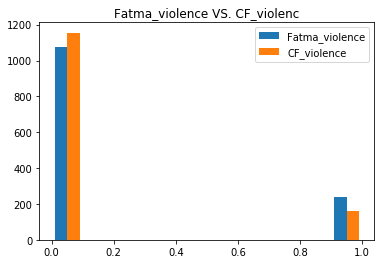

In [178]:
labels=['Fatma_violence','CF_violence']
plt.hist([df_cf_judgments['Fatma_violence'],df_cf_judgments['violence']], label=labels)
plt.title('Fatma_violence VS. CF_violenc')
plt.legend()

In [179]:
df_cf_judgments_pos_Fatma = df_cf_judgments[df_cf_judgments['Fatma_violence']==1]
df_cf_judgments_pos = df_cf_judgments[df_cf_judgments['violence']==1]
df_cf_judgments_neg_Fatma = df_cf_judgments[df_cf_judgments['Fatma_violence']==0]
df_cf_judgments_neg = df_cf_judgments[df_cf_judgments['violence']==0]

In [180]:
print('no. postive_Fatma', len(df_cf_judgments_pos_Fatma))
print('no. postive', len(df_cf_judgments_pos))
print('no. negative_Fatma', len(df_cf_judgments_neg_Fatma))
print('no. negative', len(df_cf_judgments_neg))

no. postive_Fatma 241
no. postive 160
no. negative_Fatma 1074
no. negative 1155


In [182]:
len(df_cf_judgments)

1315

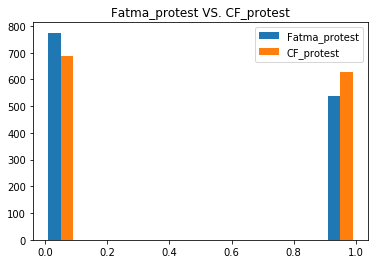

In [183]:
labels=['Fatma_protest','CF_protest']
plt.hist([df_cf_judgments['Fatma_protest'],df_cf_judgments['protest']], label=labels)
plt.title('Fatma_protest VS. CF_protest')
plt.legend()

In [184]:
df_cf_judgments['clean_text'] = df_cf_judgments['proccd_text'].apply(lambda x:clean_data(x) )

In [185]:
df_cf_judgments['clean_text'] = df_cf_judgments['clean_text'].dropna()

In [186]:
df_cf_judgments = df_cf_judgments[df_cf_judgments['clean_text']!=""]

In [187]:
df_cf_judgments = df_cf_judgments[df_cf_judgments['clean_text']!=" "]

In [188]:
df_cf_judgments = df_cf_judgments[df_cf_judgments['clean_text'].isnull() == False]

In [189]:
len(df_cf_judgments)

1214

In [190]:
df_cf_judgments.to_csv('Data/CF_Fatma_label_confidence_judgments_finalized_clean_text_28_05_2018.csv')

In [191]:
df_cf_judgments.columns

Index(['_unit_id', '_golden', '_unit_state_x', '_trusted_judgments',
       '_last_judgment_at_x', 'violence_judgment', 'violence',
       'violence_confidence', 'protest_judgment_x', 'protest',
       'protest_confidence', 'created_at', 'id', 'proccd_text',
       'Fatma_protest', 'Fatma_violence', 'clean_text'],
      dtype='object')

In [192]:
test_predict_auc_all =[]
svm_labels = []

for i in range(1,10):
    df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_cf_judgments.clean_text, 
                                                    df_cf_judgments.Fatma_violence, 
                                                    test_size=0.5)
    df_train_df = pd.concat([df_X_train,df_y_train],axis=1)
    df_test_df = pd.concat([df_X_test,df_y_test],axis = 1)
    print('training set size', len(df_train_df))
    print('training pos', len(df_train_df[df_train_df["Fatma_violence"]==1]))
    print('training neg', len(df_train_df[df_train_df["Fatma_violence"]==0]))
    print('test set size', len(df_test_df))
    print('test pos', len(df_test_df[df_test_df["Fatma_violence"]==1]))
    print('test neg', len(df_test_df[df_test_df["Fatma_violence"]==0]))
    
    df_pipeline_violence_Svc = Pipeline([
    ('vectorizer',  CountVectorizer(ngram_range=(1, 2),stop_words='english',  min_df=3)),
    ('classifier',  SVC(kernel='linear', probability=True)) ])

    
    df_scores = cross_val_score(df_pipeline_violence_Svc, df_train_df.clean_text, df_train_df.Fatma_violence, cv=10)
    print('scores',df_scores)
    print('scores mean',df_scores.mean())
    print('scores std',df_scores.std() * 2)
    
    df_cv_predict = cross_val_predict(df_pipeline_violence_Svc, df_train_df.clean_text, df_train_df.Fatma_violence, cv=10)
    df_cv_predict_scores = metrics.roc_auc_score(df_train_df.Fatma_violence, df_cv_predict)
    print('cv auc', df_cv_predict_scores)
    
    df_pipeline_violence_Svc_model = df_pipeline_violence_Svc.fit(df_train_df.clean_text, df_train_df.Fatma_violence)
    df_prediction = df_pipeline_violence_Svc_model.predict(df_test_df.clean_text)
    df_predict_prob = df_pipeline_violence_Svc_model.predict_proba(df_test_df.clean_text)
    test_predict_auc = metrics.roc_auc_score(df_test_df.Fatma_violence,df_prediction)
    print('test set auc', test_predict_auc)
    test_predict_auc_all.append(test_predict_auc)
    print(metrics.confusion_matrix(df_test_df.Fatma_violence,df_prediction))

training set size 607
training pos 117
training neg 490
test set size 607
test pos 118
test neg 489
scores [0.8852459  0.93442623 0.86885246 0.8852459  0.8852459  0.85245902
 0.80327869 0.95       0.88333333 0.91666667]
scores mean 0.8864754098360654
scores std 0.0791200410088823
cv auc 0.7832025117739403
test set auc 0.7256074312848775
[[461  28]
 [ 58  60]]
training set size 607
training pos 117
training neg 490
test set size 607
test pos 118
test neg 489
scores [0.8852459  0.80327869 0.83606557 0.86885246 0.91803279 0.85245902
 0.8852459  0.9        0.86666667 0.85      ]
scores mean 0.8665846994535519
scores std 0.06286103284917027
cv auc 0.7416797488226059
test set auc 0.783906970295657
[[460  29]
 [ 44  74]]
training set size 607
training pos 130
training neg 477
test set size 607
test pos 105
test neg 502
scores [0.83606557 0.91803279 0.8852459  0.83606557 0.80327869 0.91803279
 0.83606557 0.86666667 0.8        0.88333333]
scores mean 0.8582786885245902
scores std 0.081161817293

In [193]:
print('avg aucs on tests', np.mean(test_predict_auc_all))

avg aucs on tests 0.7489237744324533


In [195]:
svm_test_results_df = pd.DataFrame({'clean_text':df_test_df.clean_text,'Fatma_violence':df_test_df.Fatma_violence,'violence_prediction':df_prediction,
                                    'non_vio_prob':df_predict_prob[:,0],'vio_prob':df_predict_prob[:,1]})

In [196]:
len(svm_test_results_df)

607

In [197]:
#right classififcation
svm_test_results_df_right_classififcation = svm_test_results_df[svm_test_results_df['violence_prediction']==svm_test_results_df['Fatma_violence']]

In [198]:
len(svm_test_results_df_right_classififcation)

517

In [199]:
#mis-classification
svm_test_results_df_mis_classififcation = svm_test_results_df[svm_test_results_df['violence_prediction']!=svm_test_results_df['Fatma_violence']]

In [200]:
len(svm_test_results_df_mis_classififcation)

90

In [201]:
svm_test_results_df_right_classififcation_pos = svm_test_results_df_right_classififcation[
    svm_test_results_df_right_classififcation['violence_prediction'] == 1]

In [202]:
print('avg svm vio probability the correctly classififed violent tweets is', 
      np.mean(svm_test_results_df_right_classififcation_pos.vio_prob))

avg svm vio probability the correctly classififed violent tweets is 0.6884379996680189


In [203]:
print('avg svm nonviolence probability the correctly classififed violent tweets is', 
      np.mean(svm_test_results_df_right_classififcation_pos.non_vio_prob))

avg svm nonviolence probability the correctly classififed violent tweets is 0.31156200033198134


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


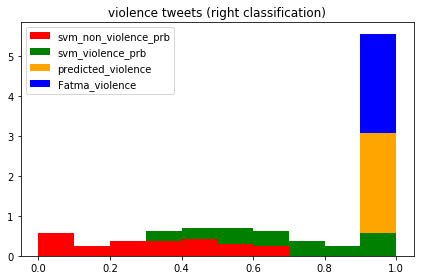

In [204]:
colors = ['red', 'green','orange', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb','predicted_violence', 'Fatma_violence']
plt.hist([svm_test_results_df_right_classififcation_pos.non_vio_prob,
         svm_test_results_df_right_classififcation_pos.vio_prob,
          svm_test_results_df_right_classififcation_pos.violence_prediction,
         svm_test_results_df_right_classififcation_pos.Fatma_violence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('violence tweets (right classification)')
plt.tight_layout()
plt.show()

In [205]:
svm_test_results_df_right_classififcation_neg = svm_test_results_df_right_classififcation[
    svm_test_results_df_right_classififcation['violence_prediction'] == 0]

In [206]:
print('avg svm vio probability the correctly classififed non-violent tweets is', 
      np.mean(svm_test_results_df_right_classififcation_neg.vio_prob))

avg svm vio probability the correctly classififed non-violent tweets is 0.07648413979169211


In [207]:
print('avg svm nonviolence probability the correctly classififed non-violent tweets is', 
      np.mean(svm_test_results_df_right_classififcation_neg.non_vio_prob))

avg svm nonviolence probability the correctly classififed non-violent tweets is 0.9235158602083078


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


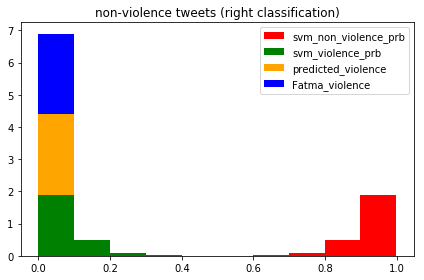

In [208]:
colors = ['red', 'green','orange', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb','predicted_violence', 'Fatma_violence']
plt.hist([svm_test_results_df_right_classififcation_neg.non_vio_prob,
         svm_test_results_df_right_classififcation_neg.vio_prob,
          svm_test_results_df_right_classififcation_neg.violence_prediction,
         svm_test_results_df_right_classififcation_neg.Fatma_violence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('non-violence tweets (right classification)')
plt.tight_layout()
plt.show()

In [209]:
svm_test_results_df_mis_classififcation_pos = svm_test_results_df_mis_classififcation[
    svm_test_results_df_mis_classififcation['violence_prediction'] == 1]

In [210]:
print('avg svm vio probability the mis classififed violent tweets is', 
      np.mean(svm_test_results_df_mis_classififcation_pos.vio_prob))

avg svm vio probability the mis classififed violent tweets is 0.5785162749835095


In [211]:
print('avg svm nonviolence probability the mis classififed violent tweets is', 
      np.mean(svm_test_results_df_mis_classififcation_pos.non_vio_prob))

avg svm nonviolence probability the mis classififed violent tweets is 0.42148372501649056


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


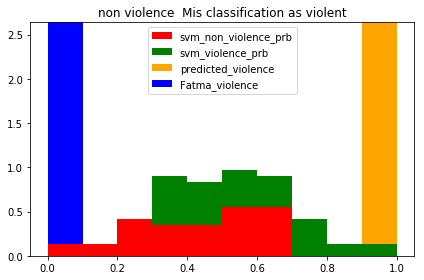

In [217]:
colors = ['red', 'green','orange', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb','predicted_violence', 'Fatma_violence']
plt.hist([svm_test_results_df_mis_classififcation_pos.non_vio_prob,
         svm_test_results_df_mis_classififcation_pos.vio_prob,
          svm_test_results_df_mis_classififcation_pos.violence_prediction,
         svm_test_results_df_mis_classififcation_pos.Fatma_violence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('non violence  Mis classification as violent')
plt.tight_layout()
plt.show()

In [213]:
svm_test_results_df_mis_classififcation_neg = svm_test_results_df_mis_classififcation[
    svm_test_results_df_mis_classififcation['violence_prediction'] == 0]

In [214]:
print('avg svm vio probability the mis-correctly classififed violent tweets is', 
      np.mean(svm_test_results_df_mis_classififcation_neg.vio_prob))

avg svm vio probability the mis-correctly classififed violent tweets is 0.1617566301641587


In [215]:
print('avg svm non-violence probability the mis classififed violent tweets is', 
      np.mean(svm_test_results_df_mis_classififcation_neg.non_vio_prob))

avg svm non-violence probability the mis classififed violent tweets is 0.8382433698358412


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


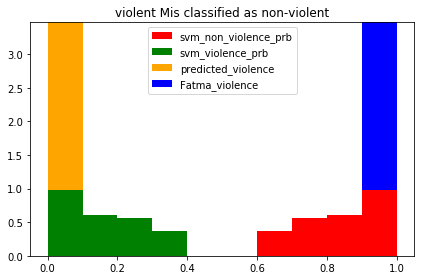

In [218]:
colors = ['red', 'green','orange', 'blue']
labels = ['svm_non_violence_prb', 'svm_violence_prb','predicted_violence', 'Fatma_violence']
plt.hist([svm_test_results_df_mis_classififcation_neg.non_vio_prob,
         svm_test_results_df_mis_classififcation_neg.vio_prob,
         svm_test_results_df_mis_classififcation_neg.violence_prediction,
         svm_test_results_df_mis_classififcation_neg.Fatma_violence],stacked=True,normed=1,
         histtype='bar',color=colors, label=labels )
plt.legend(prop={'size': 10})
plt.title('violent Mis classified as non-violent')
plt.tight_layout()
plt.show()

In [219]:
svm_test_results_df_mis_classififcation.to_csv('Data/svm_Fatma_violence_mis_classififcations.csv')
svm_test_results_df_right_classififcation.to_csv('Data/Fatma_violence_right_classififcation.casv')

In [220]:
def word_frequencies(word_list):
    freq={}

    for word in word_list:
        count=freq.get(word,0)
        freq[word]=count + 1

    frequency_list  = freq.keys()    

    results = []
    for word in frequency_list:
        tuple = (word, freq[word])
        results.append(tuple)

    byFreq=sorted(results, key=lambda word: word[1], reverse=True)


    words_names=[]
    words_count=[]
    for (word, freq) in byFreq[:10]:
        print (word, freq)
        words_names.append(word)
        words_count.append(freq)
    return words_names, words_count    

In [221]:
mis_classififed_pos_words_list = svm_test_results_df_mis_classififcation_pos['clean_text'].apply(lambda x:word_tokenize(x) )
mis_classififed_neg_words_list = svm_test_results_df_mis_classififcation_neg['clean_text'].apply(lambda x:word_tokenize(x) )

In [222]:
right_classififed_pos_words_list = svm_test_results_df_right_classififcation_pos['clean_text'].apply(lambda x:word_tokenize(x) )
right_classififed_neg_words_list = svm_test_results_df_right_classififcation_neg['clean_text'].apply(lambda x:word_tokenize(x) )

In [223]:
right_pos_words_list = [item for items in right_classififed_pos_words_list for item in items] #flatten the list of lists into one list
right_neg_words_list = [item for items in right_classififed_neg_words_list for item in items]

In [224]:
mis_pos_words_list = [item for items in mis_classififed_pos_words_list for item in items] #flatten the list of lists into one list
mis_neg_words_list = [item for items in mis_classififed_neg_words_list for item in items]

police 16
tear 7
people 7
gas 7
erdogan 4
riot 4
day 4
attack 4
cnn 4
gezipark 4


Text(0.5,1,'word freq for misclassified pos tweets')

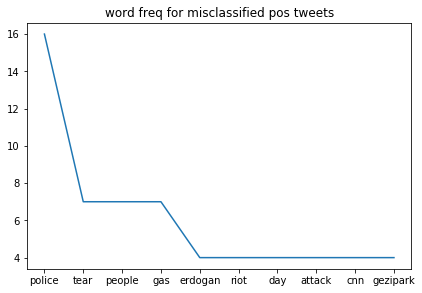

In [225]:
word, freq = word_frequencies(mis_pos_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for misclassified pos tweets')

police 13
arrested 10
via 8
erdogan 5
people 5
square 5
photos 4
video 4
riots 4
gas 4


Text(0.5,1,'word freq for misclassified neg tweets')

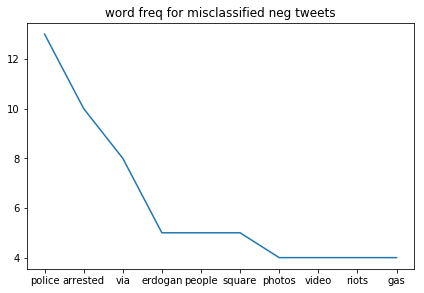

In [226]:
word, freq = word_frequencies(mis_neg_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for misclassified neg tweets')


police 48
gas 17
tear 16
ankara 10
square 8
government 7
peaceful 7
riot 6
erdogan 5
clashes 5


Text(0.5,1,'word freq for right classified pos tweets')

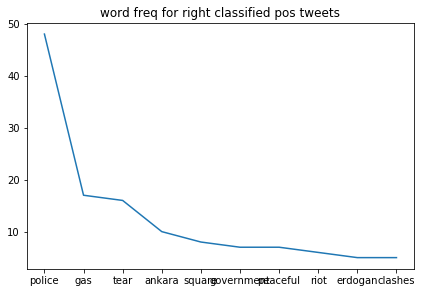

In [227]:
word, freq = word_frequencies(right_pos_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for right classified pos tweets')

erdogan 56
square 22
world 21
people 21
via 18
says 17
media 14
day 13
would 13
one 12


Text(0.5,1,'word freq for right classified neg tweets')

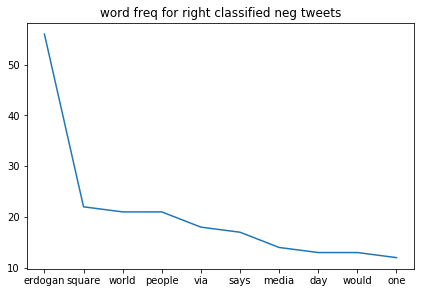

In [228]:
word, freq = word_frequencies(right_neg_words_list)
plt.plot(word,freq)
plt.tight_layout()
plt.title('word freq for right classified neg tweets')